# Perceptron
The perceptron is an iterative algorithm that classifies binary separable data. The algorithm takes multiple inputs ($x_i$), the weights, $w_i$ that tells how important the input $x_i$ is and outputs 1 if the sum of $x_i * w_i$ is greater than threshold, $b$. In mathematical form, this can be defined as 
$$
   1\ if\  \sum_{i=1}^N w_i * x_i > b, 0\ otherwise
$$
where $N$ is number of inputs.

If we move the term $b$ to the other side and define the output as $f(x)$, then it goes
$$
    f(x) = 
    \begin{cases}
        1,\ \sum_{i=1}^N x_i * w_i + b > 0 \\
        0,\ otherwise
    \end{cases}
$$

This equation can be simplified using vector notation. By including $b$ as one of the weights, then the above becomes

$$ 
f(x) =
\begin{cases}
    1,\ w \cdot x  > 0 \\
    0, otherwise
\end{cases}
$$

where $w = (b, w_1, w_2, \ldots, w_N)$ and $x = (1, x_1, x_2, \ldots, x_N)$. Notice that the dimensionality increased by 1.

The goal of the algorithm is to find weights, $w$ that classifies given data into correct classes by going through an iteratie processes.

## How to find the weights $w$?
In each iteration, the weight vector, $w$ has to be updated so that it classifies more and more data into its class and at the end, $w$ classifies all of the data into the correct class. So it is something like 

$$
    w_{i+1} = w_i + \Delta w_i\ ,\ where\  0 \leq i \leq N-1
$$

The key here is what is $\delta w_i$? It has to be related to the current prediction and some quantity of the error (how well did the algorithm predicted). This can actually be defined as follows.

$$
    \Delta w_i = \theta (y - \hat{y})x_i
$$
where $\theta$ is learning rate, $\hat{y}$ is predicted output (0 or 1) at current iteration $i$. The learning rate $\theta$ is to speed up/slow down the process.

If we visualize the process, at each iteration, it moves the weights to the closer position to the target. To this fact, $(y - \hat{y})$ only defines the direction, $-1$ or $1$.

## How to draw the boundary line?
In order to visualize the classifier, it is good to draw the line (hyperplane) that divides the data. In 2-D, it will be a line, $y = mx + b$.
The way to get the boundary line is the following.

    1. Given the weights, w, find two points on the line.
    2. Given these two points, find the slope, m, of the line. (rise over run)
    3. Given the slope, m and the bias b, find the line of equation.



### Find two points on the boundary line.
Let $w$ be a vector $(w_0, w_1, w_2)$ that divides the data and $x$ be a point vector $(1, x_0, x_1)$. Then we can derive, 
$$
  w * x = (w_0, w_1, w_2)^T * (1, x_0, x_1) = w_0 + w_1 * x_0 + w_2 * x_1 = 0  
$$

NOTE: that $x_0$ can be considered as $x$ and $x_1$ as $y$ from the equation of a line.

Then, we can solve it for $x_0$ and $x_1$.
$$
    w_0 + w_1 * x_0 + w_2 * x_1 = 0 \ =>\  x_0  = \frac{-w_2 * x_1 - w_0}{w_1}
$$

We can derive $x-intercept$ by setting $x_1=0$, then $x_0 = \frac{-w_0}{w_1}$. 

For $x_1$, we have

$$
    w_0 + w_1 * x_0 + w_2 * x_1 = 0 \ => \ x_1 = \frac{-w_1 * x_0 - w_0}{w_2}
$$

Then, we get $y-intercept$ by setting $x_0=0$, $x_1 = \frac{-w_0}{w_2}$.

So, we have two points, $(\frac{-w_0}{w_1}, 0)$ and $(0, \frac{-w_0}{w_2})$.

### Find slope of a line.
Given these two points above, we get the slope $m$ (rise over run) as follows.
$$
   m = \frac{y_1 - y_0}{x_1 - x_0} = \frac{\frac{-w_0}{w_2} - 0}{0 - \frac{-w_0}{w_1}} = -\frac{\frac{w_0}{w_2}}{\frac{w_0}{w_1}}
$$

### Find line of equation.
Since we have slope, $m$ and the $y-intercept$, we get the following.
$$
    y = mx + b = -\frac{\frac{w_0}{w_2}}{\frac{w_0}{w_1}} * x + (- \frac{w_0}{w_2})
$$

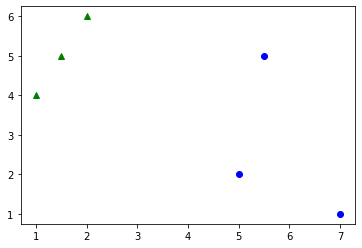

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import perceptron

# [x, y, label]
matrix = [
    [1,  4, 1],
    [2,  6, 1],
    [1.5,5, 1],
    [5,  2, 0],
    [7,  1, 0],
    [5.5,5, 0]
]

points1 = np.array([row[:2] for row in matrix if row[2] == 1])
points2 = np.array([row[:2] for row in matrix if row[2] == 0])

plt.plot(points1[:, 0], points1[:, 1], '^g')
plt.plot(points2[:, 0], points2[:, 1], 'ob')

plt.show()


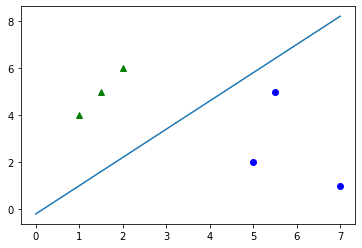

In [9]:
def y(w, x):
    if w[2] == 0 or w[1] == 0:
        return x # this case, the division equals to infinite...
        
    return (w[0]/w[2])/(w[0]/w[1]) * -1 +  (w[0]/w[2]) * -1 * x

limit = 20
w = perceptron.learn(matrix)

plt.plot(points1[:, 0], points1[:, 1], '^g')
plt.plot(points2[:, 0], points2[:, 1], 'ob')
plt.plot([0,7], [y(w, 0), y(w,7)])
plt.show()

# References
    - [Perceptron](https://www.youtube.com/watch?v=4Gac5I64LM4)